<a href="https://colab.research.google.com/github/sandesh-543/AI_ML-class-project/blob/main/AI_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Placements_Dataset.csv')

In [ ]:
df.shape

(220000, 19)

In [ ]:
df = df.sample(n = 4000, random_state = 32).reset_index(drop = True)
df.shape

(4000, 19)

In [ ]:
df = df.drop(['Name of Student', 'Roll No.', 'No. of DSA questions', 'Interview Room Temperature'], axis = 1)
df.head()

,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows HTML,Knows CSS,Knows Cricket,Knows Dance,Participated in College Fest,Was in Coding Club,No. of backlogs,Age of Candidate,Branch of Engineering,Placement Package
0,0.82,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,2,22,Civil Engineering,5.05
1,9.95,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,2,25,Electrical Engineering,34.50
2,0.87,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,3,21,Electrical Engineering,6.35
3,0.94,No,No,No,No,Yes,No,No,No,Yes,No,4,22,Civil Engineering,3.70
4,4.13,Yes,No,No,Yes,No,Yes,No,No,No,Yes,1,21,Civil Engineering,10.46


In [ ]:
df.dropna()

,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows HTML,Knows CSS,Knows Cricket,Knows Dance,Participated in College Fest,Was in Coding Club,No. of backlogs,Age of Candidate,Branch of Engineering,Placement Package
0,0.82,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,2,22,Civil Engineering,5.05
1,9.95,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,2,25,Electrical Engineering,34.50
2,0.87,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,3,21,Electrical Engineering,6.35
3,0.94,No,No,No,No,Yes,No,No,No,Yes,No,4,22,Civil Engineering,3.70
4,4.13,Yes,No,No,Yes,No,Yes,No,No,No,Yes,1,21,Civil Engineering,10.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1.25,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,2,22,Civil Engineering,10.92
3996,8.58,No,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes,4,22,Civil Engineering,35.07
3997,7.37,No,No,Yes,No,Yes,No,No,No,Yes,No,2,21,Computer Science,24.62
3998,5.19,No,No,No,No,No,Yes,Yes,No,Yes,Yes,5,25,Computer Science,28.76


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CGPA                          4000 non-null   float64
 1   Knows ML                      3912 non-null   object 
 2   Knows DSA                     4000 non-null   object 
 3   Knows Python                  3916 non-null   object 
 4   Knows JavaScript              3923 non-null   object 
 5   Knows HTML                    3923 non-null   object 
 6   Knows CSS                     3917 non-null   object 
 7   Knows Cricket                 4000 non-null   object 
 8   Knows Dance                   4000 non-null   object 
 9   Participated in College Fest  4000 non-null   object 
 10  Was in Coding Club            4000 non-null   object 
 11  No. of backlogs               4000 non-null   int64  
 12  Age of Candidate              4000 non-null   int64  
 13  Bra

In [ ]:
for i in ['Knows ML', 'Knows DSA', 'Knows Python', 'Knows JavaScript', 'Knows HTML', 'Knows CSS', 'Knows Cricket', 'Knows Dance', 'Participated in College Fest', 'Was in Coding Club'] :
    df[i] = df[i].replace({'Yes' : 1, 'No' : 0})

In [ ]:
df.head()

,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows HTML,Knows CSS,Knows Cricket,Knows Dance,Participated in College Fest,Was in Coding Club,No. of backlogs,Age of Candidate,Branch of Engineering,Placement Package
0,0.82,0.0,1,0.0,1.0,1.0,1.0,1,0,0,1,2,22,Civil Engineering,5.05
1,9.95,1.0,0,0.0,1.0,1.0,0.0,0,1,0,1,2,25,Electrical Engineering,34.50
2,0.87,0.0,1,1.0,1.0,1.0,1.0,1,1,0,1,3,21,Electrical Engineering,6.35
3,0.94,0.0,0,0.0,0.0,1.0,0.0,0,0,1,0,4,22,Civil Engineering,3.70
4,4.13,1.0,0,0.0,1.0,0.0,1.0,0,0,0,1,1,21,Civil Engineering,10.46


In [ ]:
df['Branch of Engineering'].unique()
df=pd.get_dummies(df,columns=['Branch of Engineering'],drop_first=True,dtype=int)
df.head()

,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows HTML,Knows CSS,Knows Cricket,Knows Dance,Participated in College Fest,Was in Coding Club,No. of backlogs,Age of Candidate,Placement Package,Branch of Engineering_Computer Science,Branch of Engineering_Electrical Engineering,Branch of Engineering_Mechanical Engineering
0,0.82,0.0,1,0.0,1.0,1.0,1.0,1,0,0,1,2,22,5.05,0,0,0
1,9.95,1.0,0,0.0,1.0,1.0,0.0,0,1,0,1,2,25,34.50,0,1,0
2,0.87,0.0,1,1.0,1.0,1.0,1.0,1,1,0,1,3,21,6.35,0,1,0
3,0.94,0.0,0,0.0,0.0,1.0,0.0,0,0,1,0,4,22,3.70,0,0,0
4,4.13,1.0,0,0.0,1.0,0.0,1.0,0,0,0,1,1,21,10.46,0,0,0


In [ ]:
y=df['Placement Package']
x=df.drop('Placement Package',axis=1)
mmax=MinMaxScaler()
cols=[i for i in x.columns if x[i].nunique()>2]

In [ ]:
df[cols]=mmax.fit_transform(df[cols])
df.head()

,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows HTML,Knows CSS,Knows Cricket,Knows Dance,Participated in College Fest,Was in Coding Club,No. of backlogs,Age of Candidate,Placement Package,Branch of Engineering_Computer Science,Branch of Engineering_Electrical Engineering,Branch of Engineering_Mechanical Engineering
0,0.081081,0.0,1,0.0,1.0,1.0,1.0,1,0,0,1,0.4,0.571429,5.05,0,0,0
1,0.994995,1.0,0,0.0,1.0,1.0,0.0,0,1,0,1,0.4,1.000000,34.50,0,1,0
2,0.086086,0.0,1,1.0,1.0,1.0,1.0,1,1,0,1,0.6,0.428571,6.35,0,1,0
3,0.093093,0.0,0,0.0,0.0,1.0,0.0,0,0,1,0,0.8,0.571429,3.70,0,0,0
4,0.412412,1.0,0,0.0,1.0,0.0,1.0,0,0,0,1,0.2,0.428571,10.46,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.30,random_state=32)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, r2_score, mean_squared_error

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(xtrain, ytrain)
y_pred = rf.predict(xtest)

In [ ]:
r2_score_test = r2_score(ytest, y_pred)
print("R2 Score:", r2_score_test)

R2 Score: 0.6654260409191796


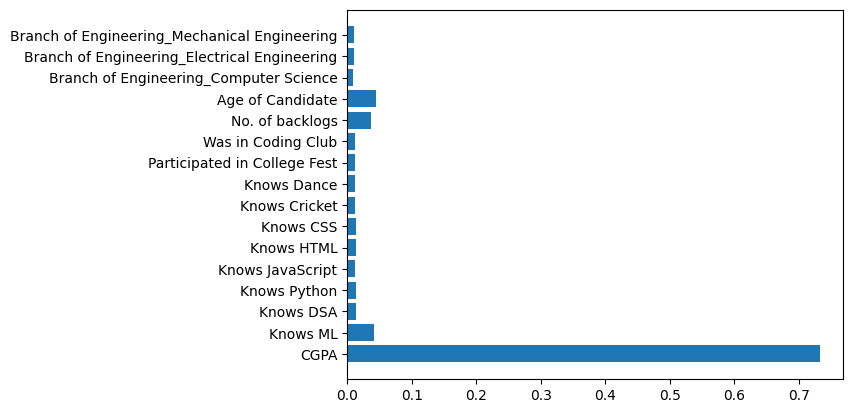

In [ ]:
plt.barh(xtrain.columns,rf.feature_importances_)
plt.show()

In [ ]:
data_to_predict = {
    "CGPA": [8.5, 7.2, 8.9, 6.5, 7.8, 8.3, 6.9, 7.1, 8.4, 7.5],
    "Knows ML": [1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
    "Knows DSA": [1, 1, 1, 0, 1, 1, 0, 1, 1, 0],
    "Knows Python": [1, 1, 1, 0, 1, 1, 0, 1, 1, 1],
    "Knows JavaScript": [0, 1, 1, 0, 0, 1, 1, 0, 1, 1],
    "Knows HTML": [1, 0, 1, 1, 1, 0, 1, 0, 1, 1],
    "Knows CSS": [1, 1, 1, 0, 1, 1, 1, 1, 1, 0],
    "Knows Cricket": [1, 0, 0, 1, 0, 1, 0, 1, 0, 0],
    "Knows Dance": [0, 0, 1, 0, 1, 1, 0, 1, 0, 0],
    "Participated in College Fest": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
    "Was in Coding Club": [1, 1, 1, 0, 0, 1, 0, 1, 1, 1],
    "No. of backlogs": [0, 2, 0, 5, 1, 0, 3, 1, 0, 2],
    "Age of Candidate": [22, 21, 23, 22, 22, 21, 23, 20, 22, 21],
    "Branch of Engineering_Computer Science": [1, 1, 1, 0, 0, 1, 0, 1, 0, 0],
    "Branch of Engineering_Electrical Engineering": [0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
    "Branch of Engineering_Mechanical Engineering": [0, 0, 0, 0, 1, 0, 0, 0, 0, 1]
}

y_actual = [35.69, 32.3693, 38.01, 25.46, 32.8389, 29.051 , 45.534,
       28.5601, 25.0255, 39.2492]


In [ ]:
df_predict = pd.DataFrame(data_to_predict)

In [ ]:
rf_predictions = rf.predict(df_predict)

In [ ]:
rf_predictions

array([36.6519, 33.4193, 40.8901, 27.0641, 34.8389, 32.582 , 38.4354,
       30.9701, 33.0255, 36.2492])

In [ ]:
calculated_r2_score = r2_score(y_actual, rf_predictions)
print("R2 Score:", calculated_r2_score)

R2 Score: 0.587449148235188


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor

imputer = SimpleImputer(strategy='mean')

xtrain_imputed = imputer.fit_transform(xtrain)
xtest_imputed = imputer.transform(xtest)
ytrain_imputed = imputer.fit_transform(ytrain.values.reshape(-1, 1))
ytest_imputed = imputer.transform(ytest.values.reshape(-1, 1))

for i in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(xtrain_imputed, ytrain)
    y_pred = knn.predict(xtest_imputed)
    knn_r2_score = r2_score(ytest, y_pred)
    print("R2 Score for ", i, "neighbors: ", knn_r2_score)

R2 Score for  1 neighbors:  0.2004024472298258
R2 Score for  2 neighbors:  0.445233153650042
R2 Score for  3 neighbors:  0.5280914561304079
R2 Score for  4 neighbors:  0.5570312992614004
R2 Score for  5 neighbors:  0.566534958766217
R2 Score for  6 neighbors:  0.5817871671083159
R2 Score for  7 neighbors:  0.5890369477039428
R2 Score for  8 neighbors:  0.5940353557844544
R2 Score for  9 neighbors:  0.5958139241700723
R2 Score for  10 neighbors:  0.5944929993544317
R2 Score for  11 neighbors:  0.5977154919233149
R2 Score for  12 neighbors:  0.6015972106071423
R2 Score for  13 neighbors:  0.6013947939997003
R2 Score for  14 neighbors:  0.6017199271174669
R2 Score for  15 neighbors:  0.6032265496469273
R2 Score for  16 neighbors:  0.6032512880665039
R2 Score for  17 neighbors:  0.60112400484877
R2 Score for  18 neighbors:  0.6061785886391002
R2 Score for  19 neighbors:  0.604320430965698
R2 Score for  20 neighbors:  0.6057518681823844


In [ ]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier # Changed import statement to use sklearn.neighbors instead of sklearn.classification.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

xgb_model.fit(xtrain, ytrain)

xgb_predictions = xgb_model.predict(xtest)


xgb_r2_score = r2_score(ytest, xgb_predictions)
print("XGBoost R2 Score:", xgb_r2_score)


XGBoost R2 Score: 0.577333151427047


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(xtrain.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

nn_model.compile(loss='mean_squared_error',
                 optimizer='adam'
                 )

nn_model.fit(xtrain, ytrain, epochs=100, batch_size=32, verbose=1)

nn_predictions = nn_model.predict(xtest_imputed)

nn_predictions = np.nan_to_num(nn_predictions, nan=np.nanmean(nn_predictions))

ytest_imputed = np.nan_to_num(ytest_imputed, nan=np.nanmean(ytest_imputed))

nn_predictions = nn_predictions.ravel()

nn_predictions = np.nan_to_num(nn_predictions, nan=np.nanmean(nn_predictions))
ytest_imputed = np.nan_to_num(ytest_imputed, nan=np.nanmean(ytest_imputed))

# Ensure both arrays have the same shape and data type
nn_predictions = nn_predictions.astype(ytest_imputed.dtype)
ytest_imputed = ytest_imputed.ravel()

nn_r2_score = r2_score(ytest_imputed, nn_predictions)
print("Neural Network R2 Score:", nn_r2_score)

# ... (Rest of your code) ...

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan
Epoch 9/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan
Epoch 10/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan
Epoch 11/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan
Epoch 12/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan
Epoch 13/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan
Epoch 14/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan
Epoch 15/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan
Epoch 16/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

ValueError: Input contains NaN.

In [ ]:
df.columns

Index(['CGPA', 'Knows ML', 'Knows DSA', 'Knows Python', 'Knows JavaScript',
       'Knows HTML', 'Knows CSS', 'Knows Cricket', 'Knows Dance',
       'Participated in College Fest', 'Was in Coding Club', 'No. of backlogs',
       'Age of Candidate', 'Placement Package',
       'Branch of Engineering_Computer Science',
       'Branch of Engineering_Electrical Engineering',
       'Branch of Engineering_Mechanical Engineering'],
      dtype='object')